In [2]:
import numpy as np 
from matplotlib import pyplot as plt
import pylab

In [3]:
from sklearn.datasets import fetch_openml

mist= fetch_openml('mnist_784', as_frame=False)

c:\Users\david.fernandezrebor\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
mist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X,y = mist['data'], mist['target']

In [6]:
y.shape

(70000,)

In [7]:
def plot_digit(image_data):
    image=image_data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis('off')

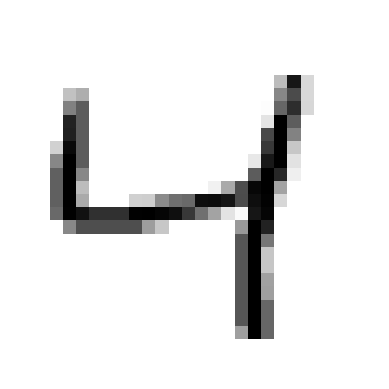

In [8]:

un_digito=X[2]
plot_digit(un_digito)


In [9]:
y=y.astype(int)
y[2]

4

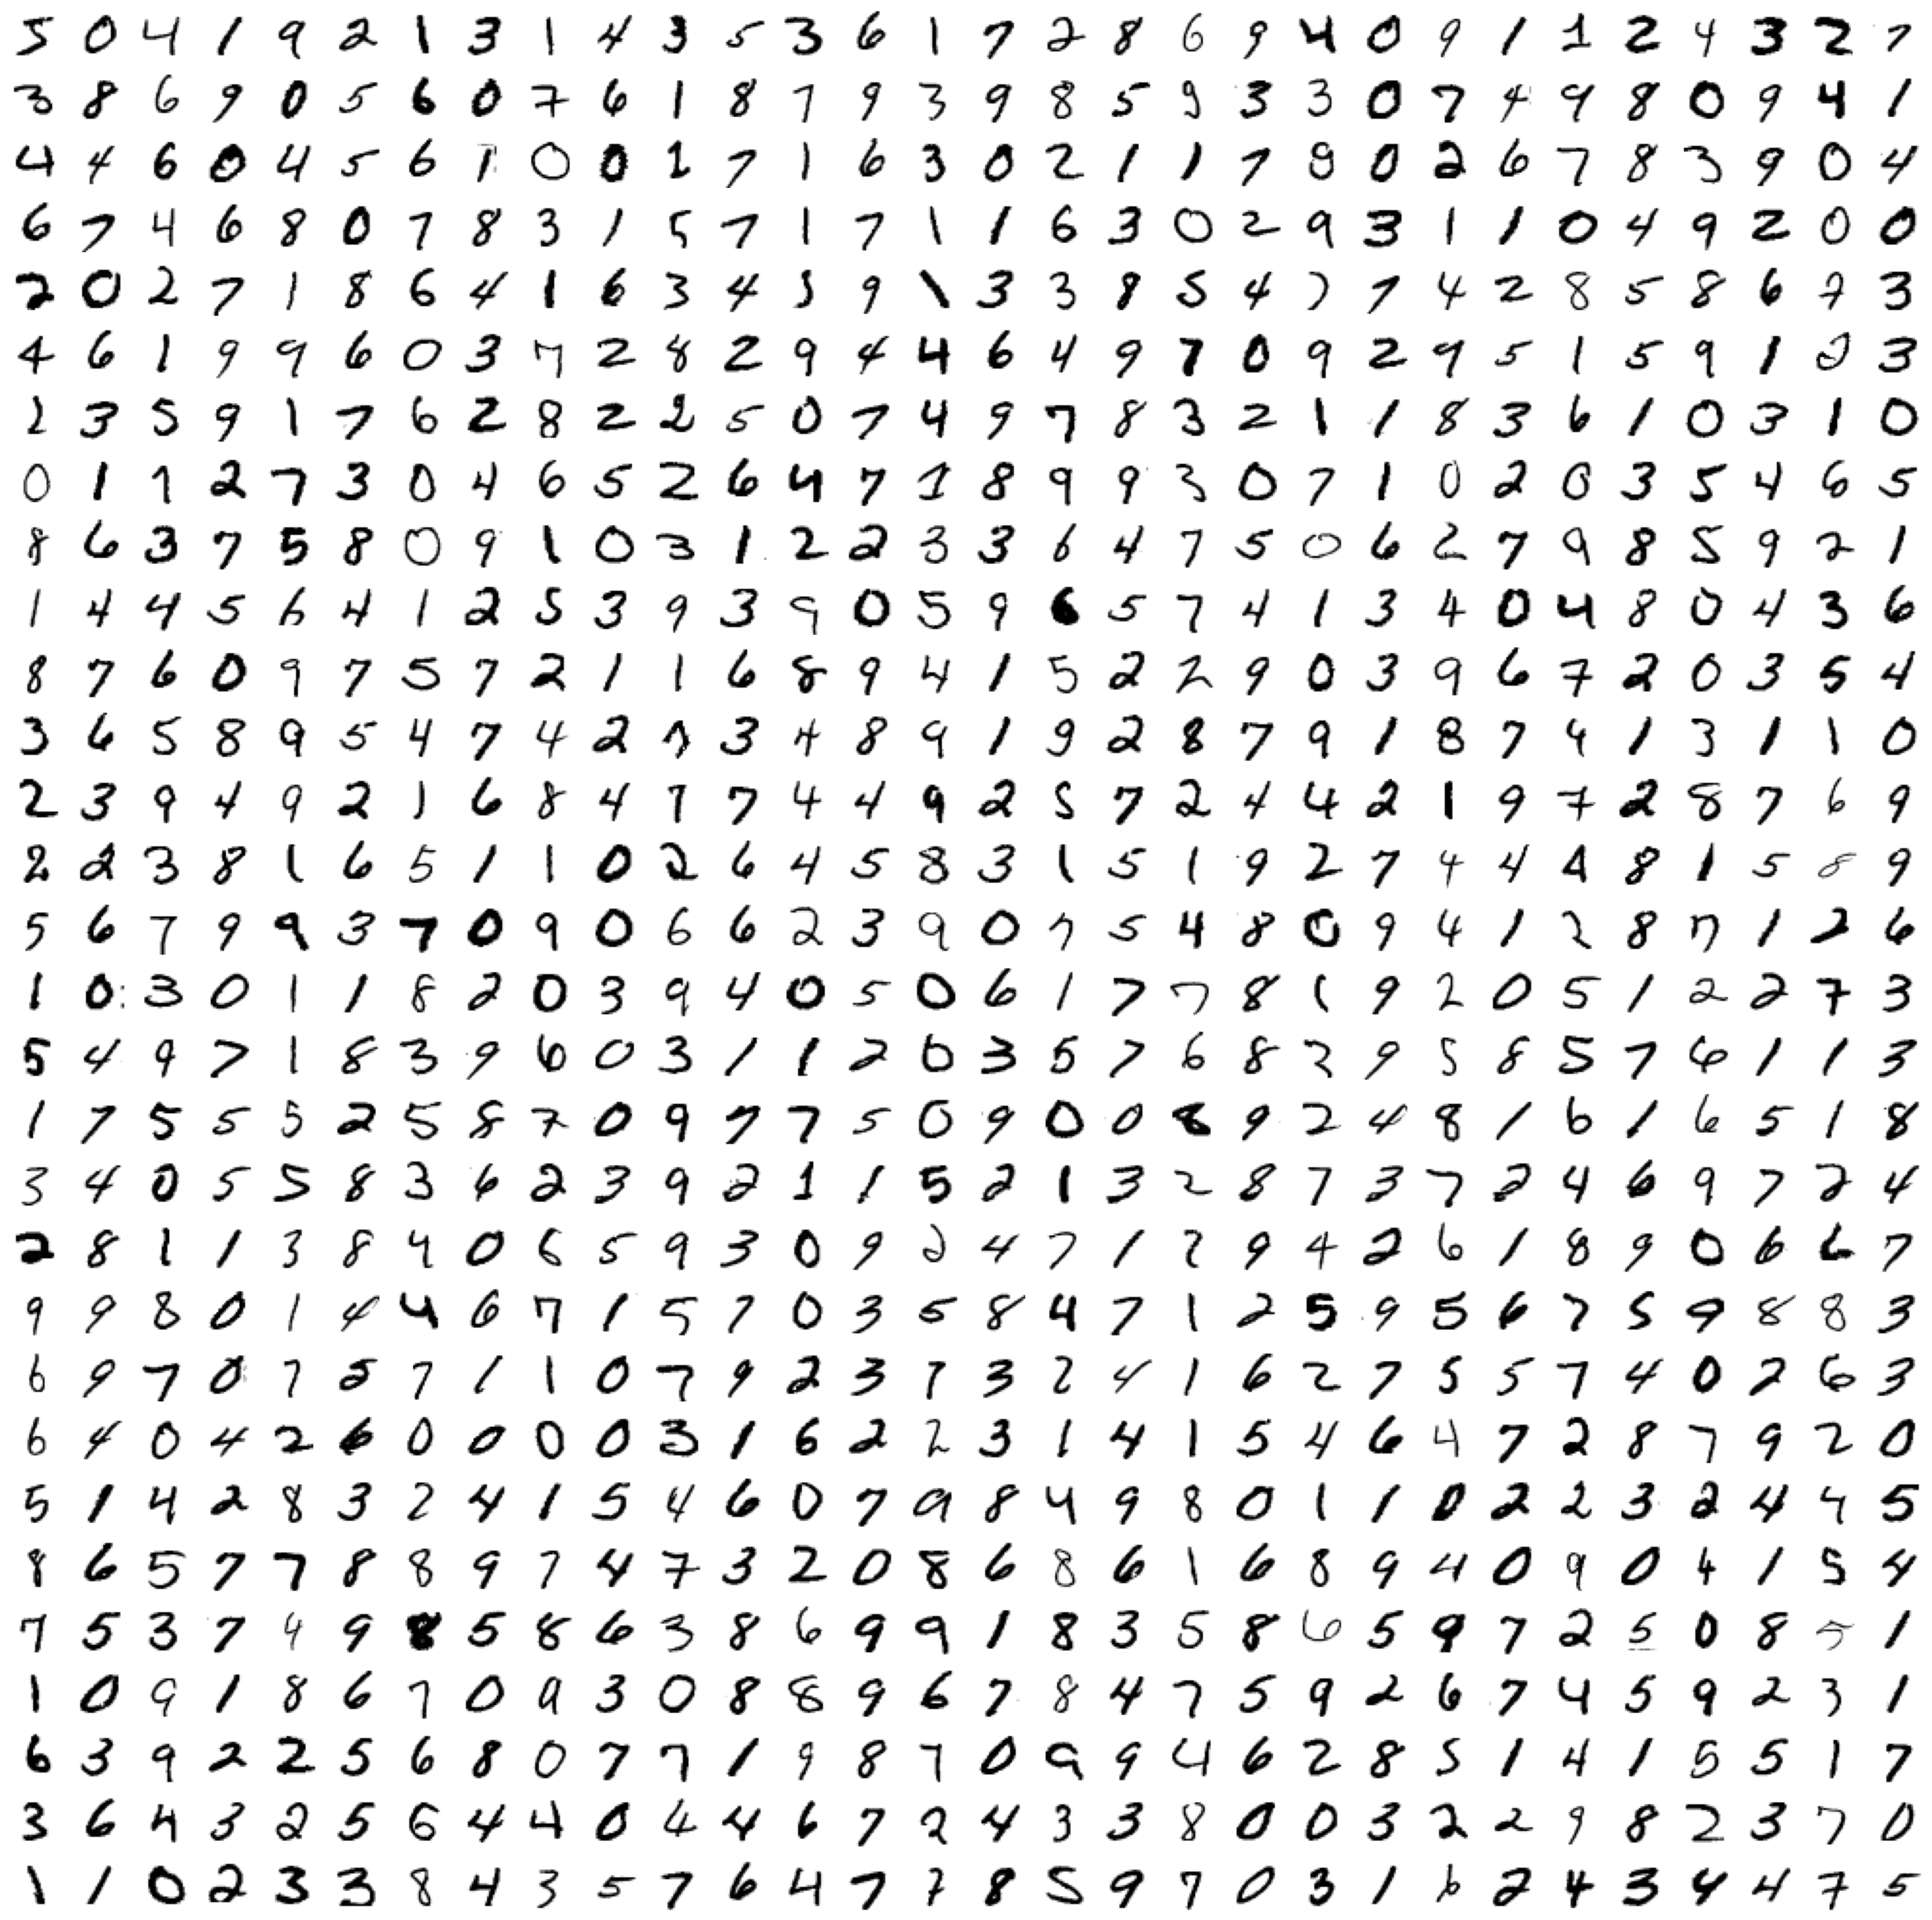

In [10]:
plt.figure(figsize=(30,30))
for i, image_data in enumerate(X[:900]):
    plt.subplot(30,30,i+1)
    plot_digit(image_data)
plt.show()

In [11]:
len(X)

70000

In [10]:
X_train,X_test, Y_train,Y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [11]:
y_train_5=( Y_train==5)
y_test_5=(Y_test==5)
y_train_5

array([ True, False, False, ...,  True, False, False])

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier()
sgd_clf.fit(X_train,y_train_5)

SGDClassifier()

In [13]:
sgd_clf.predict([X_train[0]])

array([ True])

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96635, 0.96275, 0.9595 ])

In [15]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [20]:
n5_clf=Never5Classifier()
cross_val_score(n5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [21]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53993,   586],
       [ 1426,  3995]], dtype=int64)

In [23]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5,y_train_pred)

0.8720803318052827

In [24]:
recall_score(y_train_5,y_train_pred)

0.7369489024165283